In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score






### Algorytm K-średnich (K-means)
#### Opis algorytmu:

- Algorytm K-średnich jest metodą klasteryzacji, która dzieli dane na K klastrów.
- Każdy punkt danych jest przypisywany do najbliższego tzw. centroidu, reprezentującego cały klaster.
- Centroidy są aktualizowane jako (swego rodzaju) średnie punktów w klastrze.
- Proces powtarza się do momentu, gdy położenia centroidów ustabilizują się.

Centroidy: [[4.   1.  ]
 [1.75 2.5 ]]
Przypisania klastrów: [1 1 1 0 1 0]


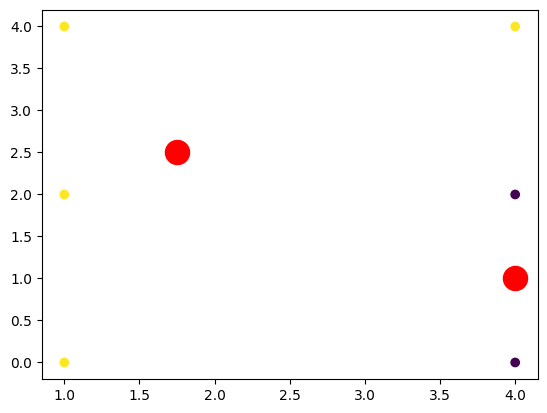

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Wykorzystanie algorytmu K-średnich
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Wyniki
print("Centroidy:", kmeans.cluster_centers_)
print("Przypisania klastrów:", kmeans.labels_)

# Wizualizacja
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


### Algorytm DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

#### Opis algorytmu:

- DBSCAN jest algorytmem klasteryzacji opartym na gęstości.
- Oznacza to, że poszczególne punkty są grupowane na podstawie gęstości (innych) punktów w ich otoczeniu.
- Punkty, które nie należą do żadnego klastra, są traktowane jako szum.
- Algorytm nie wymaga z góry określonej liczby klastrów.

Liczba klastrów: 2
Etykiety klastrów: [ 0  0  0  1  1 -1]


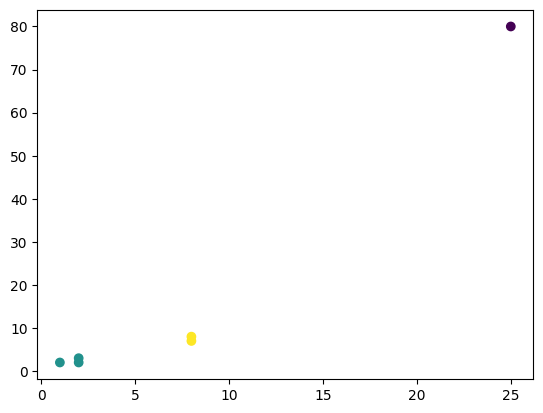

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

# Wykorzystanie algorytmu DBSCAN
db = DBSCAN(eps=3, min_samples=2)
db.fit(X)

# Wyniki
print("Liczba klastrów:", len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))
print("Etykiety klastrów:", db.labels_)

# Wizualizacja
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='viridis')
plt.show()


#### Parametr eps
- Znaczenie: $eps$ (epsilon) określa maksymalną odległość między dwoma punktami, aby mogły jeszcze być uznane za sąsiadów.
- Inaczej mówiąc, jest to promień sfery (w przestrzeni wielowymiarowej) wokół każdego punktu, w której algorytm szuka sąsiadów.

##### Wpływ na wyniki:

- Jeśli eps jest zbyt małe, algorytm może nie znaleźć wystarczającej liczby sąsiadów, co może prowadzić do wielu małych klastrów lub dużej liczby punktów uznanych za szum.
- Jeśli eps jest zbyt duże, algorytm może łączyć punkty, które nie powinny być w tym samym klastrze, co może prowadzić do zbyt dużych klastrów.


#### Parametr min_samples

- Znaczenie: min_samples określa minimalną liczbę punktów, które muszą znajdować się w promieniu eps, aby punkt był uznany za punkt rdzeniowy (core point).
- Punkty rdzeniowe są tymi, które mają wystarczającą liczbę sąsiadów, aby utworzyć wokół nich klaster.

##### Wpływ na wyniki:

- Jeśli min_samples jest zbyt małe, algorytm może uznawać za punkty rdzeniowe punkty, które nie powinny być rdzeniowe, co może prowadzić do tworzenia zbyt dużych klastrów.
- Jeśli min_samples jest zbyt duże, algorytm może nie znaleźć wystarczającej liczby punktów rdzeniowych, co może prowadzić do wielu małych klastrów lub dużej liczby punktów uznanych za szum.

### Algorytm Hierarchicznej Klasteryzacji (Hierarchical Clustering)

#### Opis algorytmu:

- Hierarchiczna klasteryzacja tworzy drzewo klastrów.
- Punkty są łączone w klastry na podstawie odległości między nimi.
- Można używać różnych metryk odległości (np. euklidesowej).
- Wynikiem jest dendrogram, który pokazuje hierarchię klastrów.

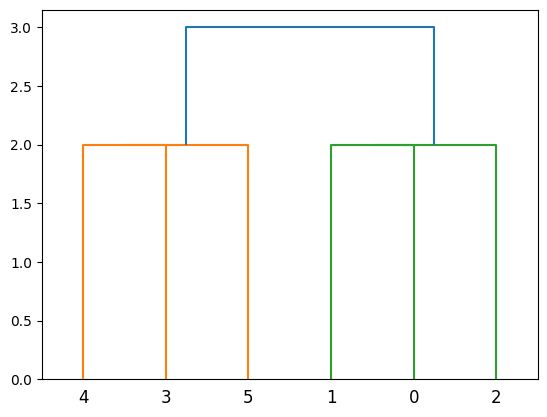

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Generowanie danych
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Wykorzystanie hierarchicznej klasteryzacji
linked = linkage(X, 'single')

# Wizualizacja dendrogramu
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


### Znaczenie zmiennej 'linked'

- Zmienna linked jest wynikiem funkcji linkage z biblioteki scipy.cluster.hierarchy.
- Zawiera ona macierz łączeń (linkage matrix), która opisuje, jak punkty są łączone w klastry w kolejnych krokach algorytmu.
- Każdy wiersz macierzy łączeń reprezentuje połączenie dwóch klastrów (lub punktów) i zawiera następujące informacje:
 - Indeksy klastrów (lub punktów) połączonych w danym kroku.
 - Odległości między połączonymi klastrami (lub punktami).
 - Liczbę elementów w nowo utworzonym klastrze.

### Parametr 'single'
#### Znaczenie parametru 'single': określa on metodę obliczania odległości między klastrami w algorytmie hierarchicznej klasteryzacji.
- Jest to jedna z "metod łączenia" (linkage methods), które decydują, jak obliczać odległość między nowo utworzonym klasterem a innymi klastrami.
- Metoda 'single' (pojedyncze łączenie) oblicza odległość jako minimalną odległość między punktami w różnych klastrach.
- Inaczej mówiąc, jest to odległość między najbliższymi sobie punktami w dwóch różnych klastrach.

#### Inne "metody łączenia":

- 'complete': Odległość między najdalszymi punktami w dwóch klastrach.
- 'average': Średnia odległość między wszystkimi punktami w dwóch klastrach.
- 'centroid': Odległość między centroidami dwóch klastrów.
- 'median': Odległość między medianami dwóch klastrów.
- 'ward': Metoda minimalizująca sumę kwadratów odległości między punktami w klastrach.

### Algorytm Gaussowskich Mieszanin (Gaussian Mixture Models, GMM)

#### Opis algorytmu:

- GMM jest modelem probabilistycznym, który zakłada, że dane pochodzą z mieszaniny kilku rozkładów Gaussa.
- Każdy klaster jest reprezentowany przez rozkład Gaussa.
- Algorytm używa tzw. metody EM ("Expectation-Maximization") do dopasowania modelu.
- Wynikiem są parametry rozkładów Gaussa dla każdego klastra.

Średnie: [[2.5        4.        ]
 [2.5        1.00003334]]
Etykiety klastrów: [1 0 1 1 0 1]


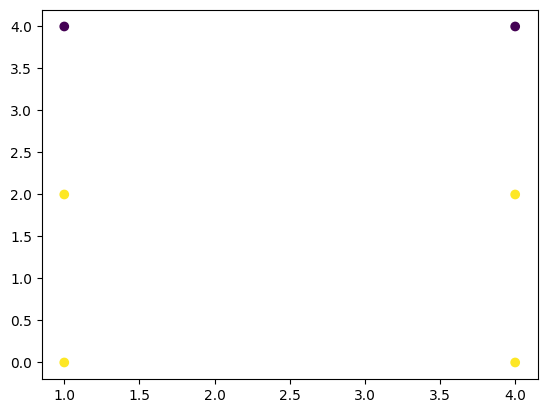

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Wykorzystanie algorytmu GMM
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# Wyniki
print("Średnie:", gmm.means_)
print("Etykiety klastrów:", gmm.predict(X))

# Wizualizacja
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis')
plt.show()


### Algorytm Analizy Głównych Składowych (Principal Component Analysis, PCA)

#### Opis algorytmu:

- PCA jest techniką redukcji wymiarowości.
- Transformuje dane do nowej przestrzeni, gdzie nowe osie (składowe główne) są liniowymi kombinacjami oryginalnych zmiennych.
- Składowe główne są uporządkowane według wariancji.
- Używany do wizualizacji i redukcji zbędnych wymiarów.

Składowe główne: [[ 0.6778734   0.73517866]
 [ 0.73517866 -0.6778734 ]]
Wariancja wyjaśniona: [0.96318131 0.03681869]


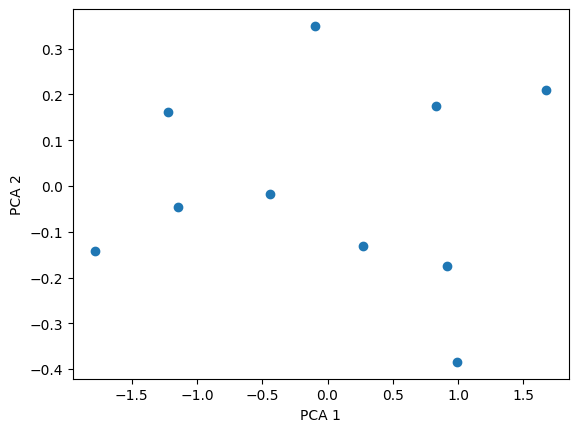

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9],
              [1.9, 2.2], [3.1, 3.0], [2.3, 2.7],
              [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Wykorzystanie algorytmu PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Wyniki
print("Składowe główne:", pca.components_)
print("Wariancja wyjaśniona:", pca.explained_variance_ratio_)

# Wizualizacja
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


#### Uporządkowanie według wariancji:

- Pierwsza składowa główna (PC1) jest taką liniową kombinacją oryginalnych zmiennych, która maksymalizuje wariancję danych. Inaczej mówiąc, PC1 jest taką oś, wzdłuż której dane są najbardziej rozproszone.
- Druga składowa główna (PC2) jest taką liniową kombinacją oryginalnych zmiennych, która maksymalizuje wariancję danych, ale jest ortogonalna (prostopadła) do PC1.
- Trzecia składowa główna (PC3) jest taką liniową kombinacją oryginalnych zmiennych, która maksymalizuje wariancję danych, ale jest ortogonalna do PC1 i PC2.
- Proces ten kontynuowany jest dla kolejnych składowych głównych, aż do wyczerpania wszystkich wymiarów danych.

###Co zawiera pca.explained_variance_ratio_?

#### "Proporcja wyjaśnionej wariancji":

- Atrybut 'pca.explained_variance_ratio_' jest tablicą, która zawiera proporcję wariancji wyjaśnionej przez każdą składową główną.
- Każdy element tej tablicy reprezentuje ułamek całkowitej wariancji danych, który jest wyjaśniony przez daną składową główną.

- Suma proporcji:

 - Suma wszystkich elementów w pca.explained_variance_ratio_ jest równa 1 (lub 100%, jeśli wyrażona w procentach), co oznacza, że cała wariancja danych jest wyjaśniona przez wszystkie składowe główne razem.

- Interpretacja:

 - Wartości w pca.explained_variance_ratio_ pozwalają ocenić, ile informacji (wariancji) jest zawarte w każdej składowej głównej.
 - Im wyższa wartość dla danej składowej głównej, tym więcej informacji ta składowa główna zawiera.